In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load dataset

In [2]:
data = pd.read_csv('../artifact/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# # Data PreProcessing

In [4]:
data.shape

(7920, 3)

# Check data set duplication null values etc

In [5]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7915,False,False,False
7916,False,False,False
7917,False,False,False
7918,False,False,False


In [8]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

as whole data set theres no error. its mean theres no any null values or duplications. But we have to do some pre processing for tweet column. we haver to remove marks (^^, ?, !), some keyword "like for as" and remove links etc

# Text Preprocessing (Tweet)

Theres 6 way to pre process the text 
    <li>Convert Uppercase to Lowercase (Hello hello mek vachana 2k vidiyt gnne. so apita me okkom ekm formt ekkt gnn oni)
    <li>Remove links
    <li>Remove Punctuation (!, @, # %, $ etc)
    <li>Remove numbers
    <li>Remove stop words (and, the, is, by, in, about )
    <li>Stemming (Ekm vachane akara kipayakat tiyenna puluvn Ex:- creating, creative, created, creates me okkoma venuvt apita create kiyn base ek gann ek)

In [9]:
import re
import string

In [10]:
data["tweet"].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

1. All texts convert to lower case

In [11]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [12]:
data["tweet"].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

2. Remove the links

In [13]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
data["tweet"].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

3. Remove the Puncuations

In [15]:
# This is inbuild one. this punctuation will return all the punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
def remove_puncuation(text):
    for puncuation in string.punctuation:
        text = text.replace(puncuation,'')
    return text

data["tweet"] = data["tweet"].apply(remove_puncuation)

In [17]:
data["tweet"].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

4. Remove the Numbers

In [18]:
# tail will start return value from end of the array. so this will return the last 10 records
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [19]:
data["tweet"] = data["tweet"].str.replace('\d+', '', regex=True)

In [20]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

5. Remove Stopwords

In [21]:
!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [25]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [27]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

6. Stemming

In [28]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [29]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [30]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

# # End of the Data Preprocessing

Api data pre processing part ek kara. dn api me string numerical value vlt convert krgnn oni. bcz machine ekt text value read krnn ba. so mehidi issellam api vocabulary ekk hadagnn oni. eke photo ekk ati vocabulary kiyl blnn. e vocabulary eke tiyenne unique word vitri. meke srlvm venne me vge seen ekk.

assume these two data
    <li> Machine learning is subset of artifical inteligenece
    <li> I like machine learning </li><br>

Me deke words dala api array ekk hadagannv. ehidi api unique ev vitri tiyaganne. its mean me dekema machine earning tiynv so api ek parai meka liynne.l menn me array ekt tma api voccabulary kiynne. passe api ara data tika numerical vidiyt hadagnnv. e qwe uda line deka. ekt api vectorization kiynva. em vectorication krnn krama kipyk tiyei, mehidi api lesima ek tama use krnne. <br>

Mehidi api krnne assume voccabulary eke words 20k tiyei kiyl. ehidi ai krnne me vakya deka e word ganat adalav binary format eken liyagannv. e qwe assume vocabulary ek tiyenne mema [mahine, learning, subset, artifical, inteligence, like] <br>

So api plveniline ek liynne mema etkota <b> [1,1,1,1,1,0] </b> meken adahas venne machine ek tiyei text eke so 1, leraning tiyei so ekt 1 but like na so ek 0. etkota nitrm binary format ek diga = length of vocabulary<br>

Devani ek numerical vidiyt liuvma enne <b> [1,1,0,0,0,1]</b> <br>

Mehidi hama tweet ekkm ekm length ekk tiyn numerical value bvt convert venva


# # Bulding Vocabulary

In [31]:
from collections import Counter
vocab = Counter()

In [32]:
vocab.update(['java', 'python', 'javascript', 'python'])

In [33]:
vocab
# me vge attribute ek and ek ki vatavak yedila tiynvada kiyla meken apita denva

Counter({'java': 1, 'python': 2, 'javascript': 1})

In [34]:
vocab = Counter()
vocab

Counter()

In [35]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### dn api krnne me tweet eke tiyn hama data ekkm vocab ekt dana ek. then apita puluvn meke hama unique word ekkm and yedichcha vara gana blnna

In [36]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [37]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [38]:
len(vocab)

15904

In [39]:
data.shape

(7920, 3)

## meken penva ape vocab eke len ek 15904i. e kiynne api ek feature ekk represent krnna numbers 15904k gannav. but data set eke row tiyenne 7920i. so meka anivarenm overfit venva. So samyayen fetures gana aduvenn oni data records ganata vada. Itin apita mekt feture selection pavichci krl vadima co-relation tiyn feturs tika vitrk ganna. But mekedi api krnn yanne count ek 10 vada vadi eva vitrk vocabulary ek vidiyt gann eka.

In [40]:
tokens = [key for key in vocab if vocab[key] > 10]

In [41]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [42]:
len(tokens)

1146

In [43]:
def saveVocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = 'utf-8')
    file.write(data)
    file.close()
 
saveVocabulary(tokens, '../static/model/vocabulary.txt')

# # End Of The Bulding Vocabulary

# # Devide data to training and testing

In [44]:
X = data['tweet']
y = data['label']

In [45]:
!pip install scikit-learn


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
X_train

7593    hard drive complet crash bye bye thousand pict...
5036    first selfi new phone samsung newphon newmakeu...
3045    today greensmoothi ＋＋＋＝ appl grapefruit banana...
3169    think made android smarter realli hard tell sm...
1993    upgrad iphon iphon upgrad phone new technolog ...
                              ...                        
4881    orlando bloom hung like dark… news photographi...
2911    matrix pc pcgamer pcsetup alienwar razer dell ...
850     appl save itun account guy appl custom support...
7198    small fast — steemit … fast bug bug natur natu...
4344    look got iphon iphon cover asot asot armada sh...
Name: tweet, Length: 6336, dtype: object

In [48]:
X_test

3062    new cover cool minion aliexpress tank white ro...
2775    fuckyou iphon fuckyou appl fuckyou att fuckyou...
2060    best iphon case ever minion despic iphon case ...
3137    contempl beach instagram instagram followmebac...
3150    saturday smile mua makeup makeupartist jolever...
                              ...                        
1194      murphyvaleri overr overpr dont get start either
733     first pic new cellphon boy guy happin xperiasl...
2644    even siri noncommitt iphon appl phone technolo...
3467    follow happi aperitif show sky soni style tee ...
6177    birthday steve job appl discipl still worship ...
Name: tweet, Length: 1584, dtype: object

### Dn api meva numerical value bvt convert krnn oni. ehidi y_test and y_train aulk na. bcz evge value already numerical. but x_train and x_test apita numerical vidiyt convert krnn oni. Mekt api kiynva vectorize krnv kiyl

# # Vectorization

In [49]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [50]:
vectorized_x_train = vectorizer(X_train, tokens)

In [51]:
vectorized_x_train.shape

(6336, 1146)

In [52]:
vectorized_x_test = vectorizer(X_test, tokens)

In [53]:
vectorized_x_test.shape

(1584, 1146)

# # Check whether the dataset s balanced or not

In [54]:
y_train.value_counts()

0    4692
1    1644
Name: label, dtype: int64

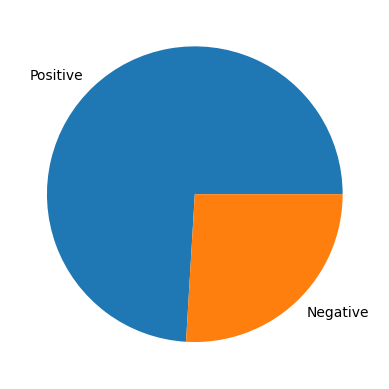

In [55]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

Meka dakkam penva negative tweet tiyenne 1598. but meke positive tweet 4738 k tiynva. So meka imbalanced dataset ekk. mek api handle krnn oni. em nattan api dena tweet ek positive ekk kiynn vadi namburutavak dakvanava. so api eka balance krnn oni

# # Handle Imbalanced Dataset

In [56]:
!pip install imbalanced-learn

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9384, 1146) (9384,)


In [58]:
y_train_smote.value_counts()

1    4692
0    4692
Name: label, dtype: int64

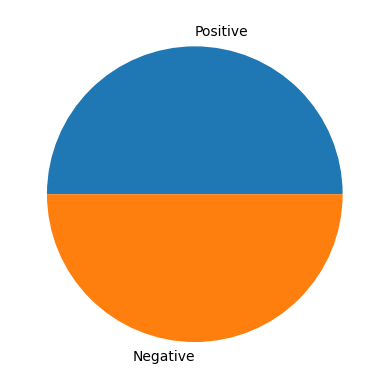

In [59]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

meke me vectorized_x_train_smote ekai y_train_smote ekai denva train krnn and vectorized_x_test ekai y_test ekai denva test krnn

# # Model Training and Evaluation

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
# Meke krl tiyenne method 2k hdl accuracy ek blnn. training accuracy ek and testing accuracy ek. (validation_scores used to get testing acc)
# ehidi me part deka sub part 4n bll tyenne. eke me round kiyla avasena 3 dila tiyenne dashama sthana 3t print krnn

# Logistic Regression

In [62]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)
# Me vidiyt tama model ek build krnne. dn me model ek use krl api training accuracy ek and testing accuracy ek blmu

LogisticRegression()

In [63]:
y_train_pred = lr.predict(vectorized_x_train_smote)
y_train_pred
# Mke krl tiyenne api hadagattu model ek, vectorized_x_train_smote use krl prediction krn eka

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [64]:
y_train_smote
# Me tama actual value tika

0       1
1       0
2       0
3       0
4       0
       ..
9379    1
9380    1
9381    1
9382    1
9383    1
Name: label, Length: 9384, dtype: int64

In [65]:
# Dn api accuracy ek blmu
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy = 0.938
	Precision = 0.913
	Recall = 0.968
	F1-Score = 0.939


Me venkm balue training acuracy ek. ek attam hodai. but api attam blnn oni testing accuracy. so metanin palleha api ek blnne

In [66]:
y_test_pred = lr.predict(vectorized_x_test)
y_test_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
y_test

3062    0
2775    1
2060    0
3137    0
3150    0
       ..
1194    1
733     0
2644    0
3467    0
6177    0
Name: label, Length: 1584, dtype: int64

In [68]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy = 0.881
	Precision = 0.71
	Recall = 0.859
	F1-Score = 0.777


### Me deka bluvm penva training accuracy ekt vada testing accuracy ek vadi vge. so its mean mek tikak overfit vela vge kiyn eka. mekt visadumak vidiyt apita puluvn fetures tikak adukrl blnn

# Naive Bayes

In [69]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.87
	Recall = 0.959
	F1-Score = 0.913
Testing Scores:
	Accuracy = 0.871
	Precision = 0.667
	Recall = 0.927
	F1-Score = 0.775


# Decision Tree

In [70]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)
y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.833
	Precision = 0.662
	Recall = 0.631
	F1-Score = 0.646


Meke me 1.0 kiynne 100% kiyn ek. mehi training 100% unata testing aduvel. its mean mekaoverfit vela. hetuva meke fetures gana vadi.

# Random Forest

In [71]:
rf = RandomForestClassifier()
rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)
y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.874
	Precision = 0.741
	Recall = 0.733
	F1-Score = 0.737


# Support Vector Machine

In [72]:
svm = SVC()
svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)
y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.958
	Recall = 0.999
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.884
	Precision = 0.736
	Recall = 0.812
	F1-Score = 0.772


Api metaning training process erk ivr krnva. but meke tava step ekk ivrrht gihin prameter tuning part ek krnn puluvn. Ekenut me model tika improve venva

### Api metnin ehata meka continue krnn Logistice regression model ek use krnva

In [73]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)